## CUSTOMER CHURN ANALYSIS IN TELECOM 


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [56]:
#reading the dataset
df= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
df.shape
# so the dataset has 7043 entries and 20 input and 1 output columns

(7043, 21)

In [58]:
print(df.columns) #will print the columns of the dataset

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [59]:
#checking the datatypes of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [60]:
# characteristics of the numerical variables to be tested
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


INSIGHTS FROM THE ABOVE ANALYSIS 

1. Senior citizen is a categorical variable but represented as integer
2. Total charges is an numerical variable but represented in integral form 
3. 75% customers have less than 55 month tenure
4. Average monthly charges are 64.7 USD but 25% pay more than 89.95 USD

Text(0.5, 1.0, 'Classification count of Output Variable')

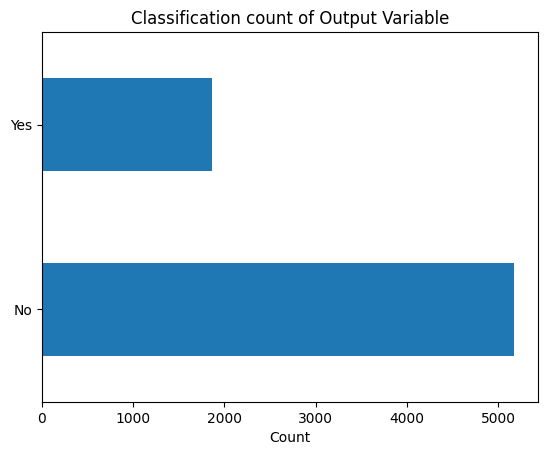

In [61]:
#plotting the output entries 
df['Churn'].value_counts().plot(kind ='barh')
plt.xlabel("Count")
plt.title("Classification count of Output Variable")

In [62]:
entries= df['Churn'].value_counts()
print(entries)
distribution =100 * df['Churn'].value_counts() / df.shape[0]
distribution

No     5174
Yes    1869
Name: Churn, dtype: int64


No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Conclusion - highly imbalanced distribution with 73% entries of one type and 27% entries of other type

Solution- To make the dataset balanced upscaling and down scaling of the data can be done. As the dataset is moderately large and upscaling won't effect the computational speed to a large extent so upscaling of the data should be done as it will provide us more accurate results.


MISSING VALUE ANALYSIS

In [63]:
miss= pd.DataFrame((df.isnull().sum())* 100 / df.shape[0]).reset_index()
print(miss)

               index    0
0         customerID  0.0
1             gender  0.0
2      SeniorCitizen  0.0
3            Partner  0.0
4         Dependents  0.0
5             tenure  0.0
6       PhoneService  0.0
7      MultipleLines  0.0
8    InternetService  0.0
9     OnlineSecurity  0.0
10      OnlineBackup  0.0
11  DeviceProtection  0.0
12       TechSupport  0.0
13       StreamingTV  0.0
14   StreamingMovies  0.0
15          Contract  0.0
16  PaperlessBilling  0.0
17     PaymentMethod  0.0
18    MonthlyCharges  0.0
19      TotalCharges  0.0
20             Churn  0.0


In [64]:
#but as we previously saw that totalcharges needs to be integer so we convert it for evaluation
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors= 'coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [65]:
#locating all the missing value entries
df.loc[df['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [66]:
# % missing values

miss_percent= pd.DataFrame(df.isnull().sum() * 100/ df.shape[0])
miss_percent

,0
customerID,0.000000
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.000000
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.000000
OnlineSecurity,0.000000


Conclusion-
1. Missing values are found only in the Total Charges column
2. The percentage of the missing values is too low i.e. 0.15%

Solution-
We should drop the missing columns as the percentage is too low

In [67]:
#dropping the missing columns
df = df.dropna()
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Seeing the data it can also be seen that using tenure as a categorical column can provide us better visualisation and efficiency

In [68]:
mx = df['tenure'].max() 
# % lets make 6 categories out of the tenure periods

cat= ["{0} - {1}".format(i, i+11) for i in range(1,72, 12)]

df['tenure_group']= pd.cut(df.tenure, range(1,80, 12), right= False, labels= cat)

#added tenure group column 
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13 - 24
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61 - 72
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1 - 12
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1 - 12


In [69]:
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [70]:
df.loc[df['tenure_group'].isnull() == True]
#no new null column has appeared 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group


In [71]:
#as we dont need customerId and tenure we can drop them
df = df.drop(columns=['tenure', 'customerID'])

UNIVARIATE DATA ANALYSIS

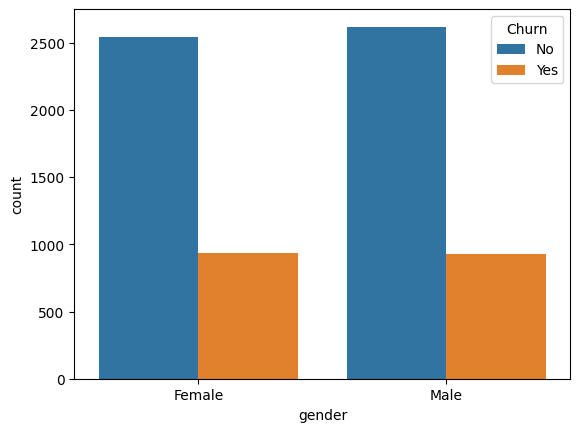

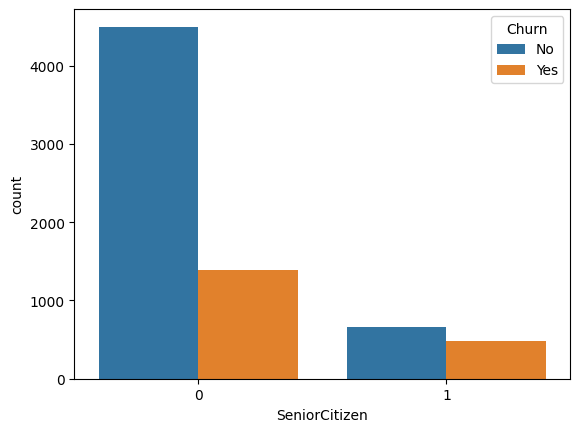

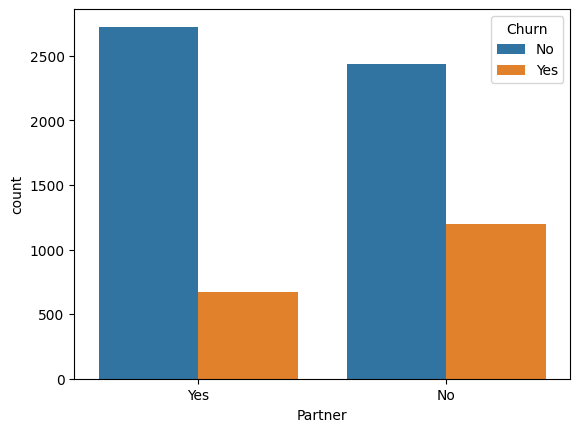

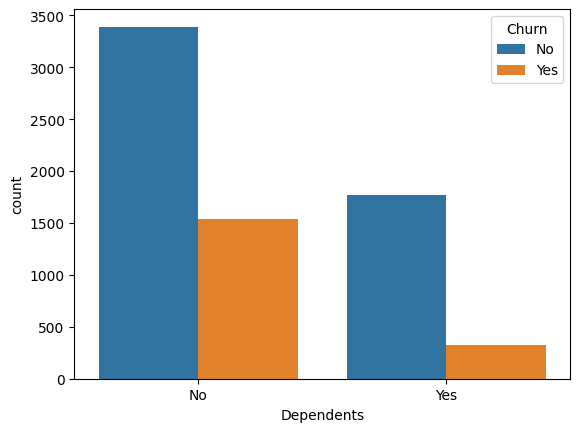

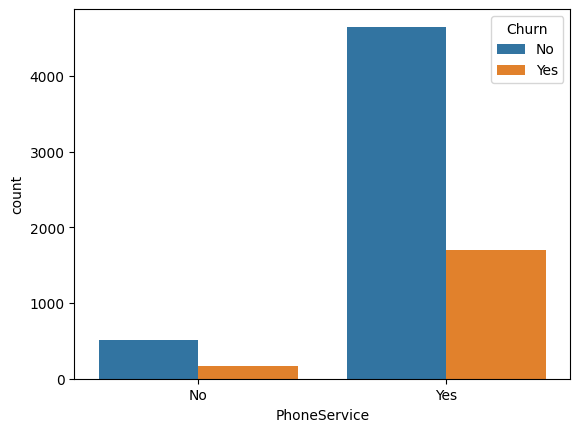

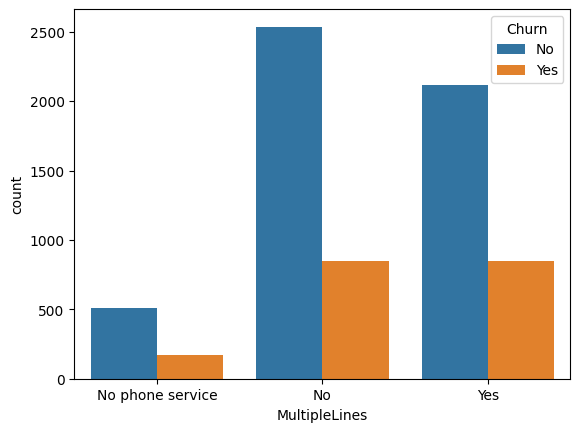

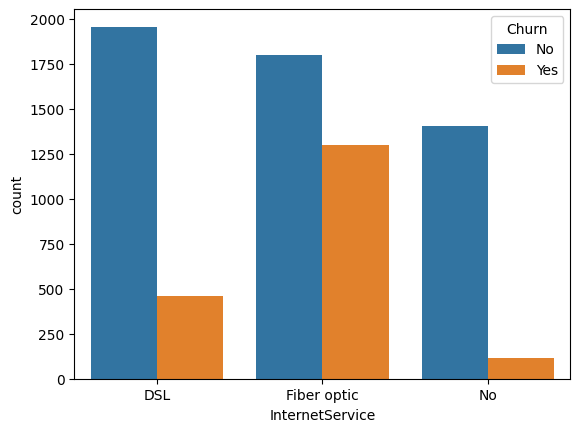

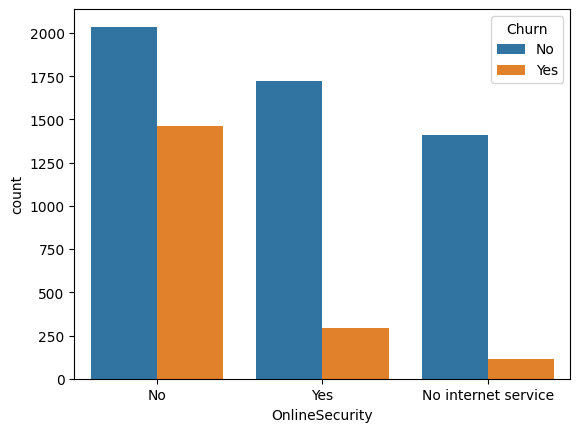

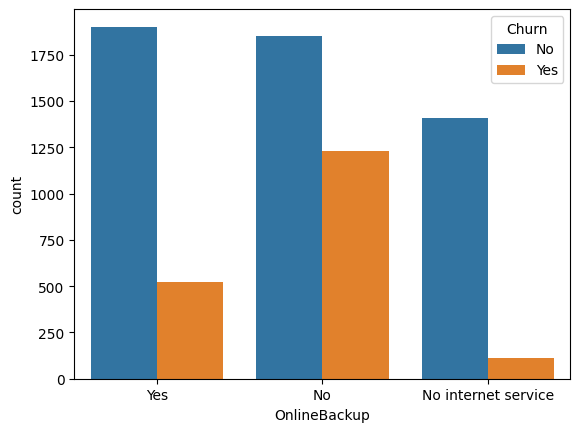

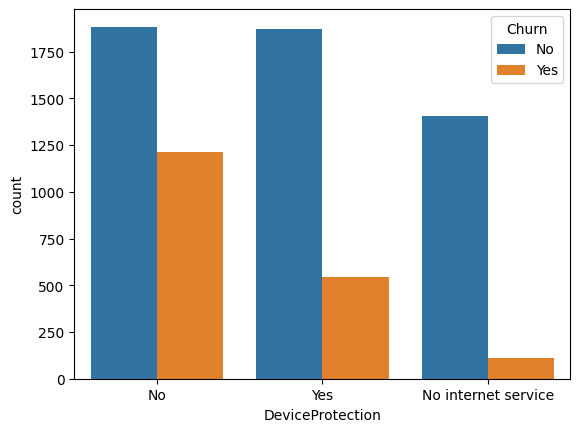

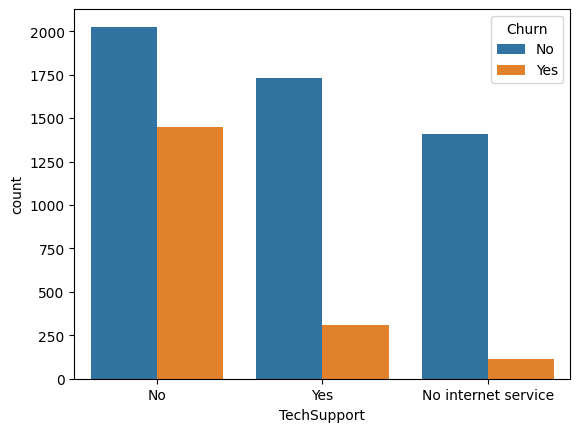

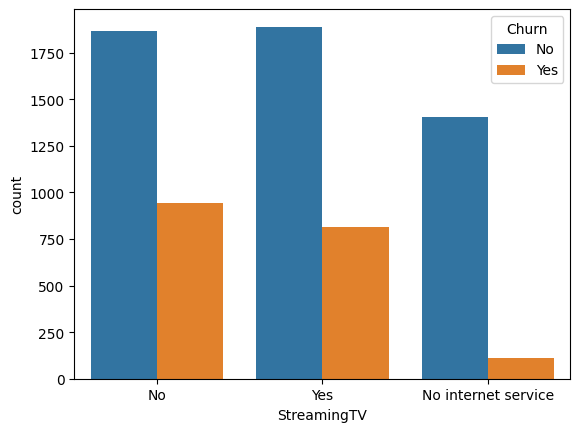

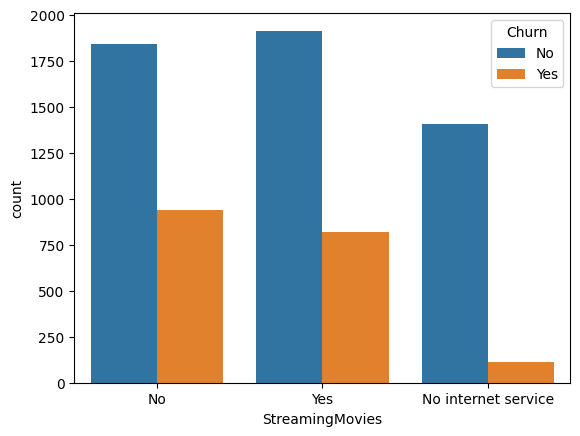

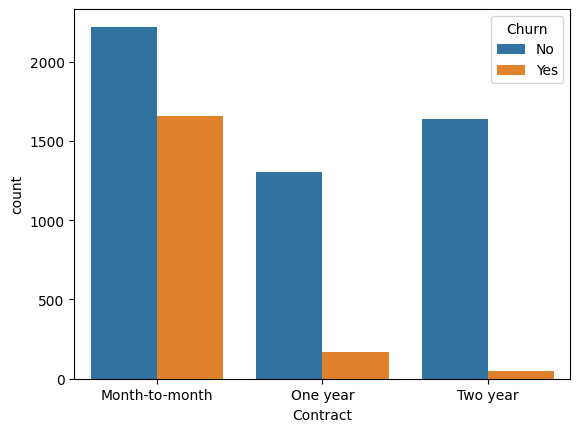

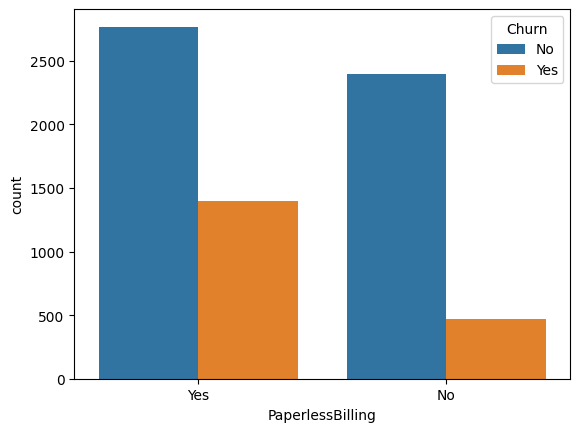

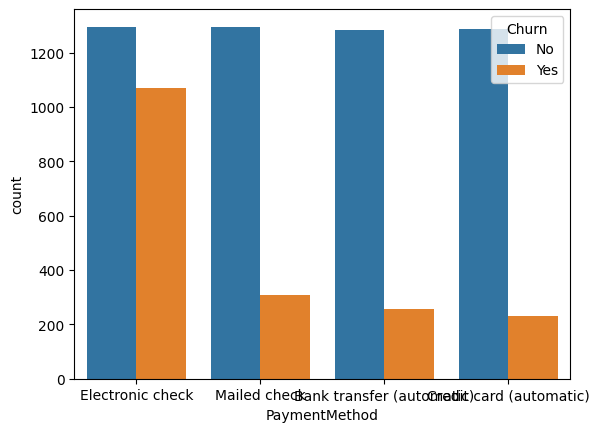

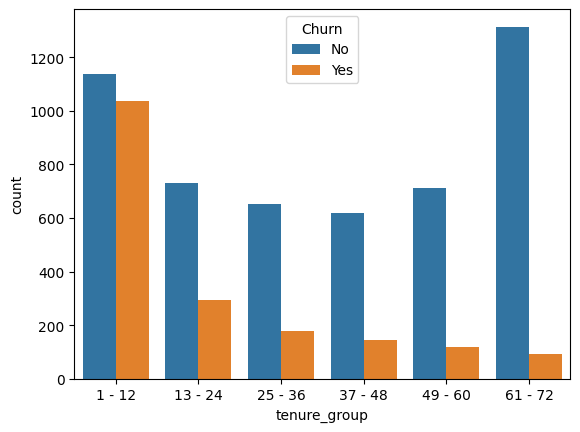

In [72]:
categorical_df= df.drop(columns= ['TotalCharges', 'MonthlyCharges'])
col= categorical_df.columns

for i in range(col.size):
    if col[i] == 'Churn':
         continue
    plt.figure(i)
    sns.countplot(data= categorical_df , x=col[i] , hue= 'Churn')

Conclusions-
1. Gender is not affecting the churn to any great extend.
2. The proportion of churners in the senior citizens is very high
3. People who don't have any partners are more likely to churn
4. Dependents are less likely to churn 
5. Phone service doesn't provide huge distinctions
6. People who have no phone service are most likely to churn , then those who have multiple lines and those having single lines are the lowest churners
7. People with fibre optic cables have very high churning ratio 
8. People having no online security are the highest churners
9. People having no online backup are high churners
10. People having no device protection are high churners
11. People who are not offered proper tech support have high churning ratio
12. People taking no internet service of streaming movies are lowest churners.
13. Bigger the contract period lower the churning. Month-to-Month subscription faces very high churning and also has highest customer base so cant be done with.
14. Paperless billing has higher churn ratio
15. Electronic check payment method has high churning and credit card payments have the lowest churning
16. People in tenure of 1-12 have very high churning %

In [73]:
# Converting categorical variables to numerical variables
df['Churn']=  np.where(df.Churn == 'Yes', 1, 0)
df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,13 - 24
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,61 - 72
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,1 - 12
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,1 - 12


For converting categorical variables to numerical variables label encoding and one hot encoding can be used
as label encoding can give more inaccurate results one hot encoding will be used

In [74]:
#One hot encoding
orig= df.copy(deep=True)
orig.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [75]:
df= pd.get_dummies(df)
df

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


Analysis for numerical variables

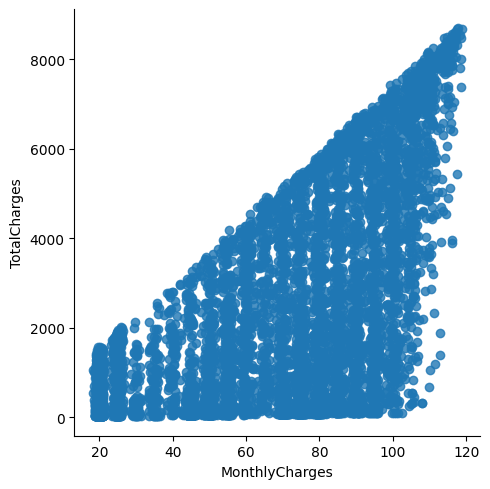

In [76]:
#Relationship between monthly charges and total charges

#scatter plot based on a reference

sns.lmplot(data= df, x= 'MonthlyCharges', y= 'TotalCharges', fit_reg= False)

Conclusion- Total Charges increase with the increase in the Monthly charges

Text(0.5, 1.0, 'Monthly charges by churn')

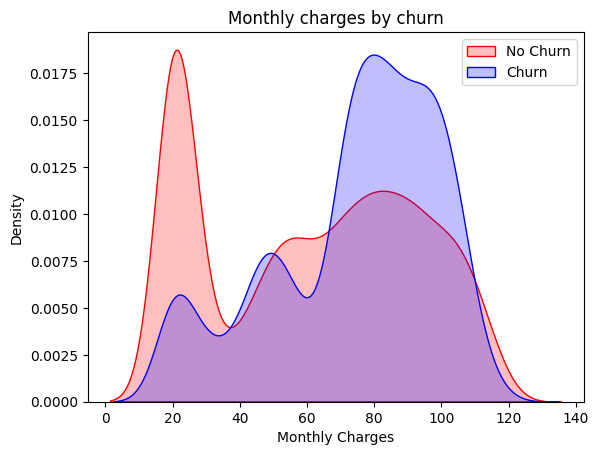

In [77]:
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ],
                ax =Mth, color="Blue", fill = True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Conclusion - High monthly charge inplies higher churn

Text(0.5, 1.0, 'Total charges by churn')

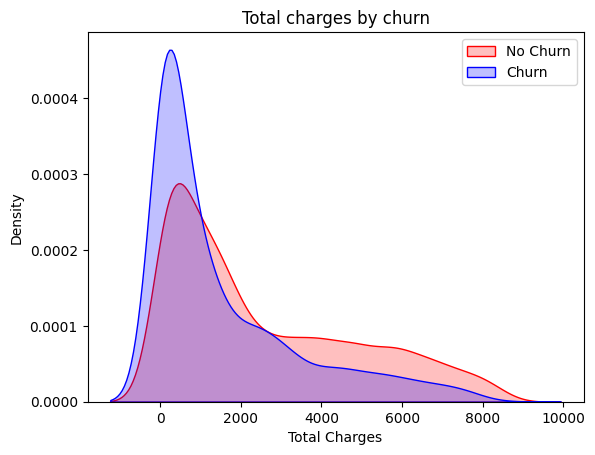

In [78]:
Tot = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0) ],
                color="Red", fill = True)
Tot = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1) ],
                ax =Tot, color="Blue", fill= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

Conclusion- Lower total charges give high churn

Inference- Higher monthly charge with low tenure gives lower total charge which has low churn

CORRELATION OF PARAMETERS

<AxesSubplot: >

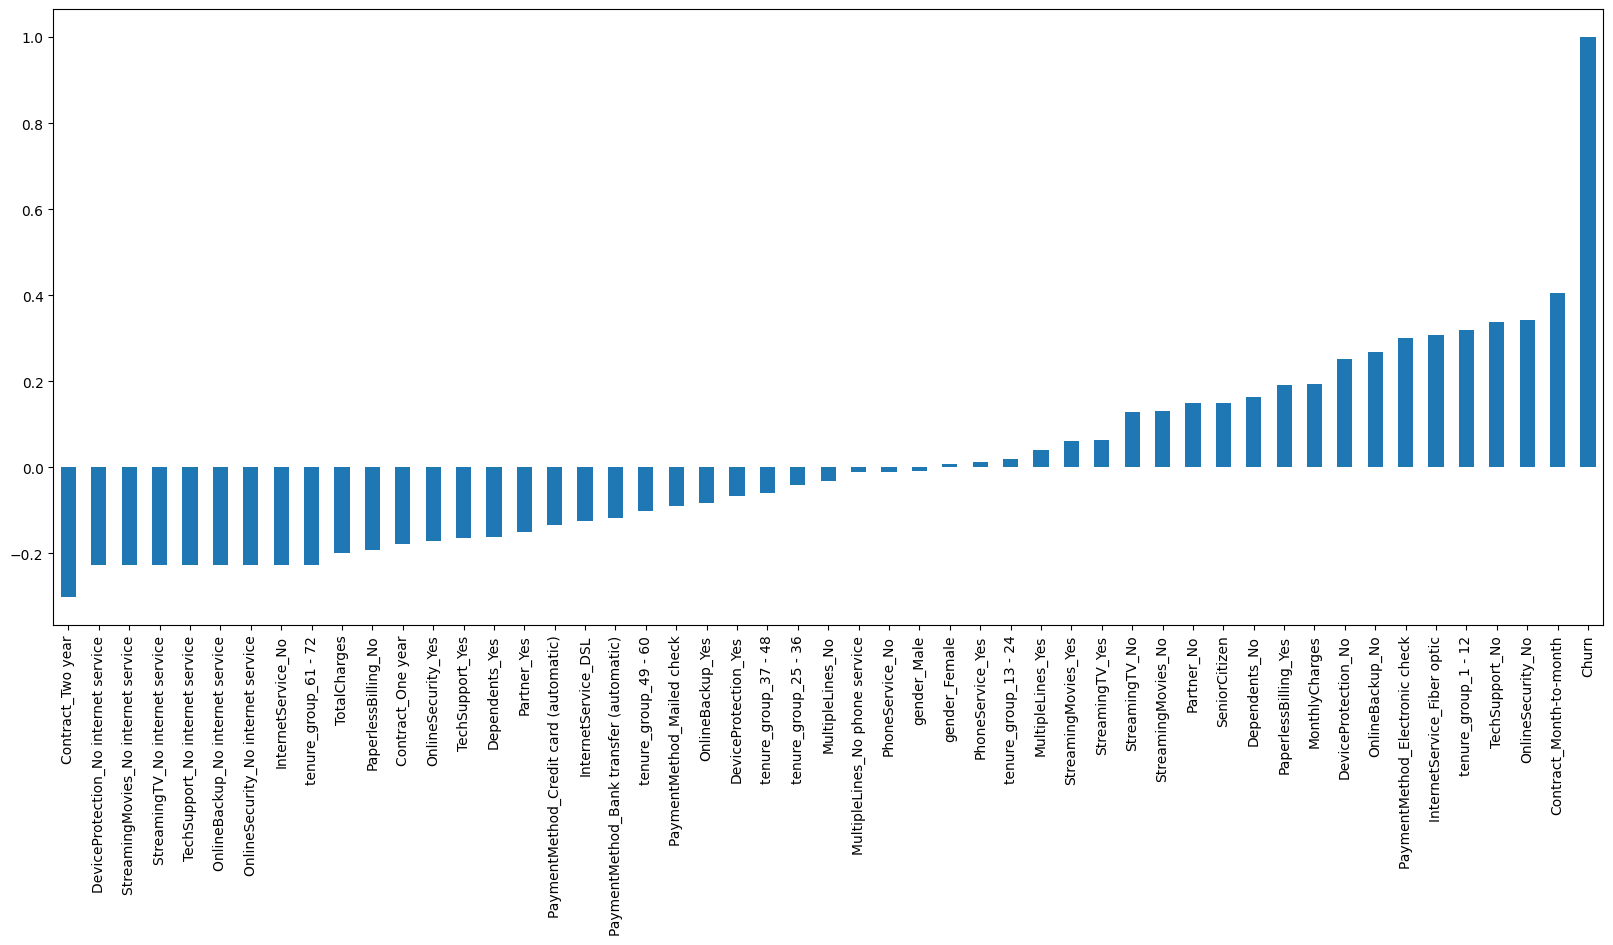

In [79]:
# Correlation with churn 
plt.figure(figsize=(20, 8))
df.corr()['Churn'].sort_values(ascending= True).plot(kind='bar')

<AxesSubplot: >

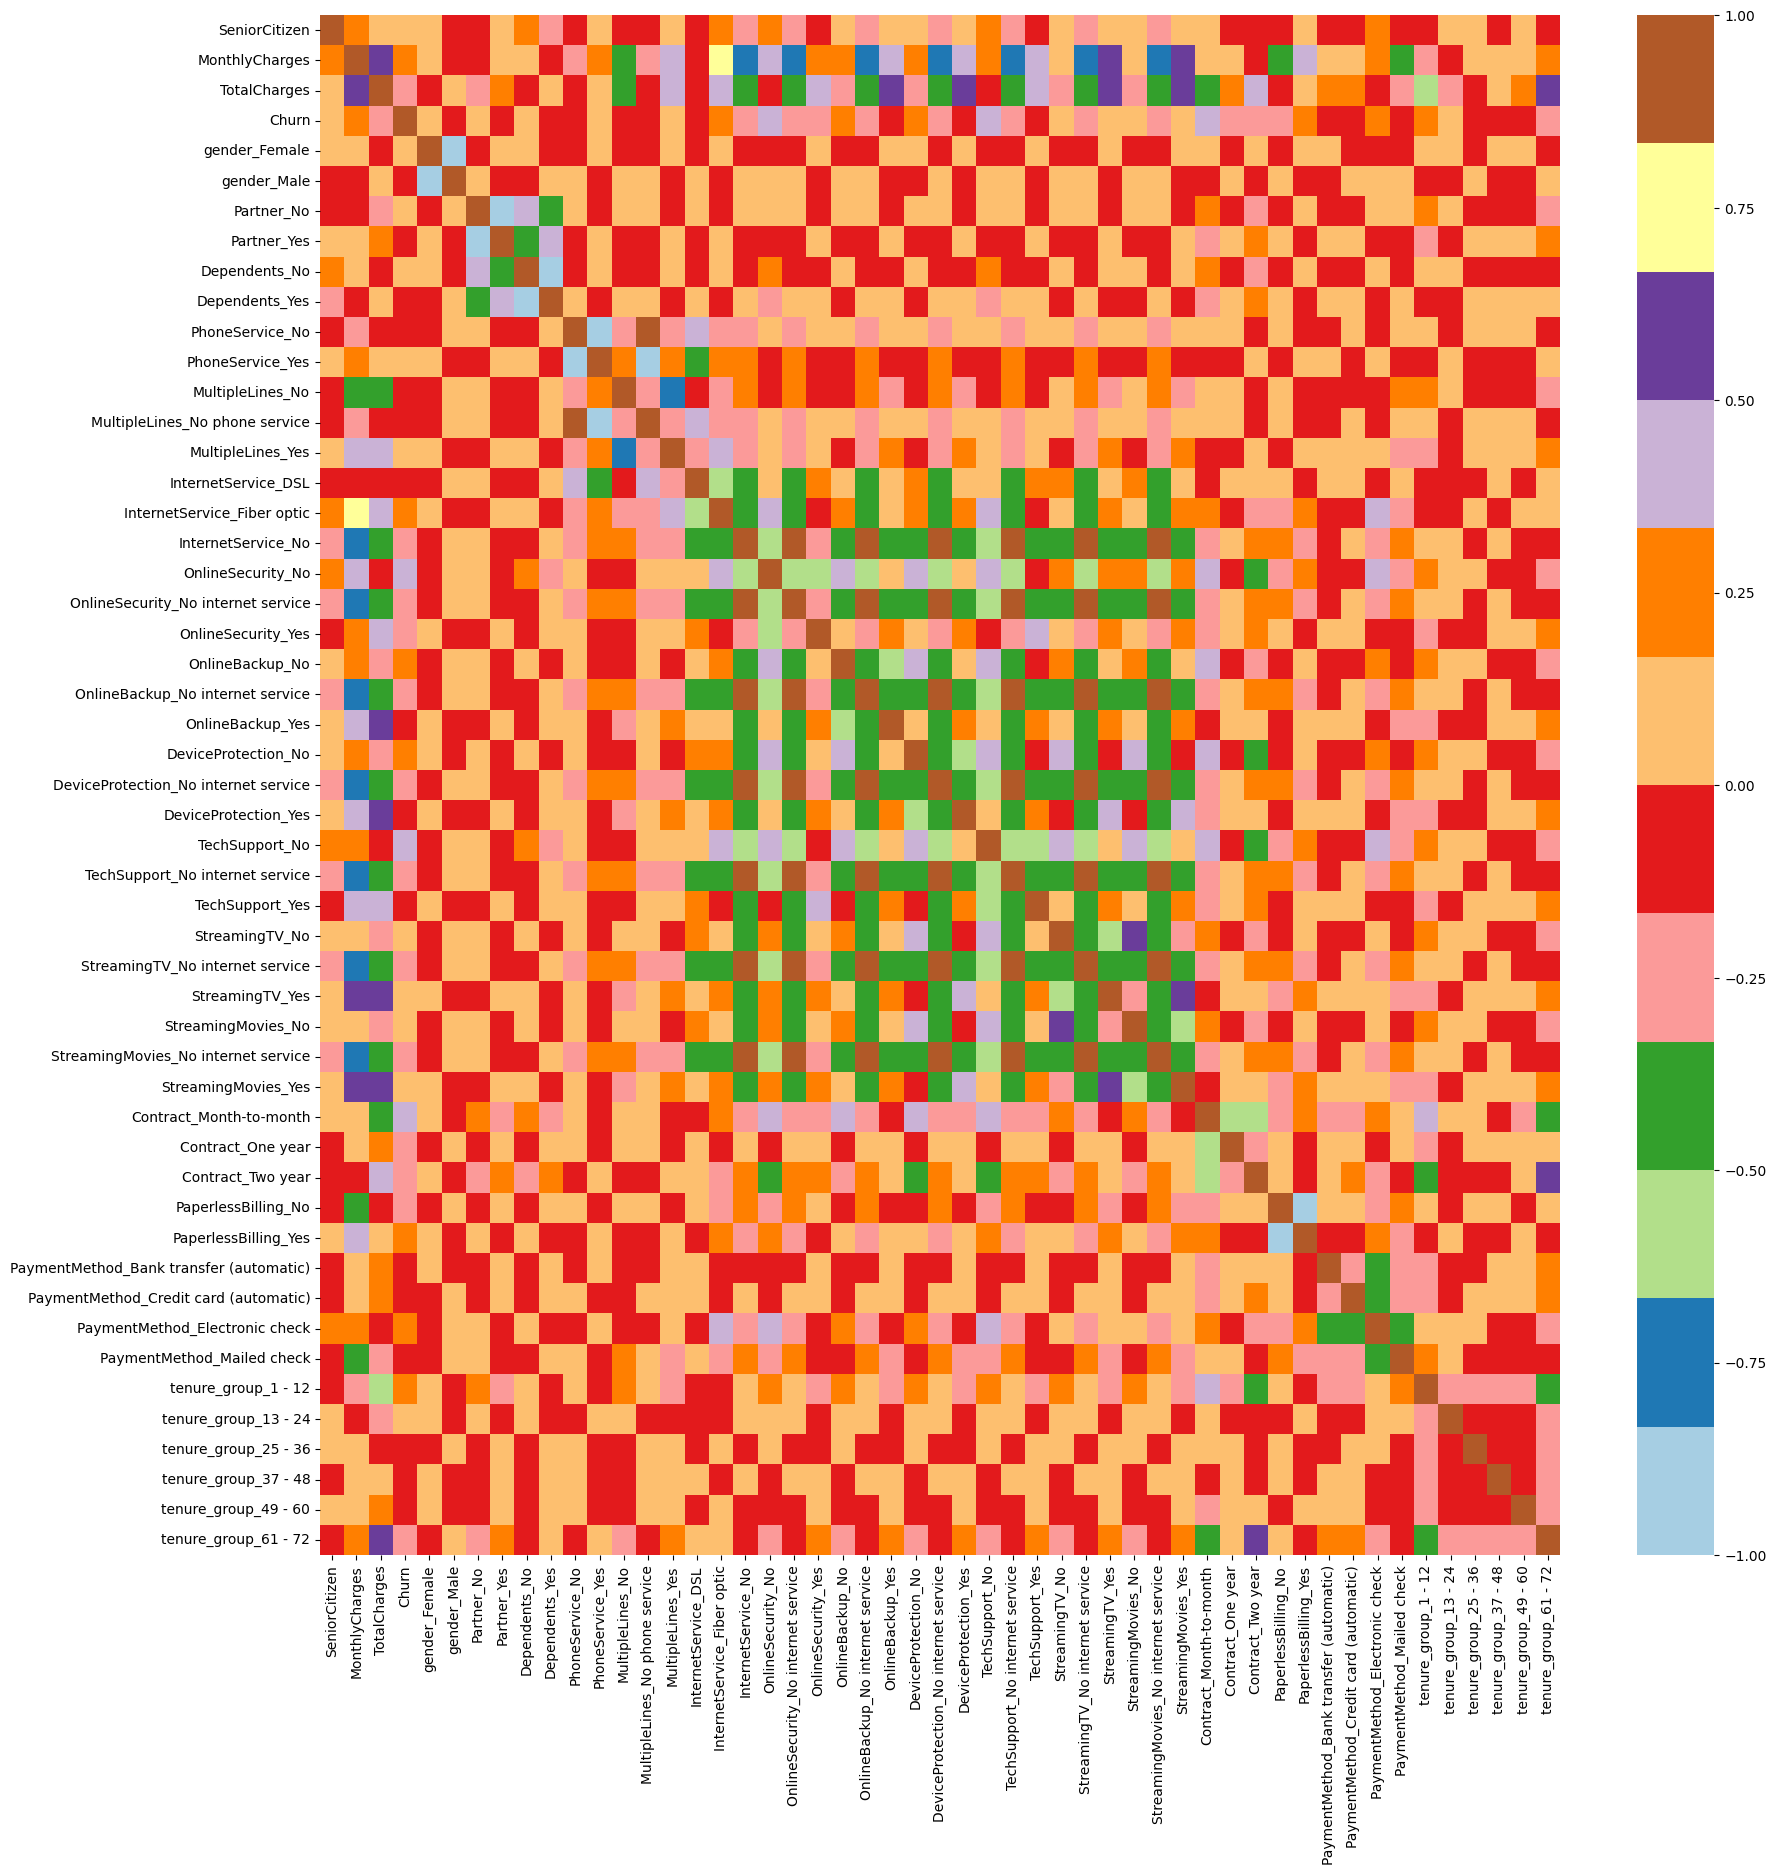

In [80]:
# Correlation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap= "Paired")

CONCLUSION-
This correlation provides us a more clear insight: <br>
High churn parameters:
1. Month to Month Contract
2. No Online Security
3. No Tech Support 
4. Tenure group 1-12
5. Fibre optic connection 

Low churn paramters:
1. Two year contract
2. No internet service is opted in device protection, movie streaming, TV streaming, Tech Support , Backup and Online security

Negligible individual affect paramters:
1. Gender 
2. Phone service


BIVARIATE ANALYSIS

In [81]:
#as we will do analysis for churned and non chruned customers separately
df_out0 = df.loc[df['Churn']==0]
df_out1= df.loc[df['Churn']==1]


Text(0.5, 1.0, 'Gender Partner relationship for Non churned customers')

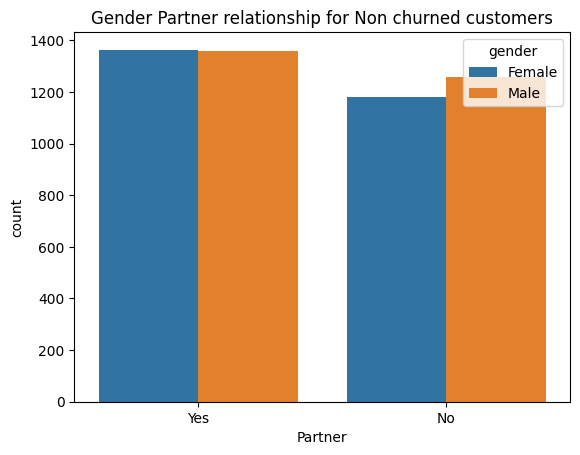

In [90]:
#NON CHURNED ANALYSIS 
orig_df= orig.drop(columns= ['TotalCharges', 'MonthlyCharges'])

orig_out0= orig_df.loc[orig_df['Churn']==0]
orig_out1= orig_df.loc[orig_df['Churn']==1]
sns.countplot(data= orig_out0 , x='Partner' , hue= 'gender')
plt.title("Gender Partner relationship for Non churned customers")

Conclusion- In non churning customers more females have partners and more males have no partners but difference not significant.

<AxesSubplot: xlabel='tenure_group', ylabel='count'>

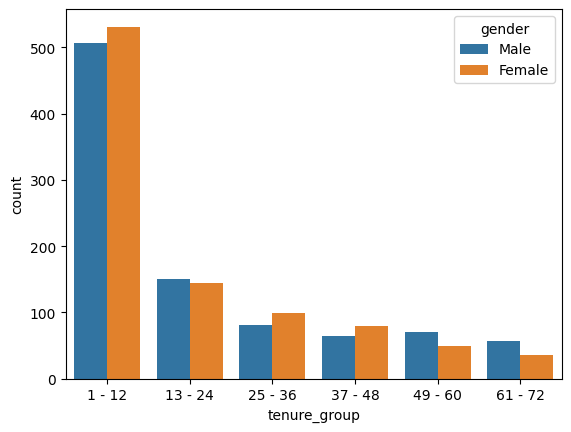

In [91]:
#Gender and tenure group relation for churners

sns.countplot(data= orig_out1 , x='tenure_group' , hue= 'gender')



Conclusion - Female are higher churners in 1-12 tenure category than males

<AxesSubplot: xlabel='SeniorCitizen', ylabel='count'>

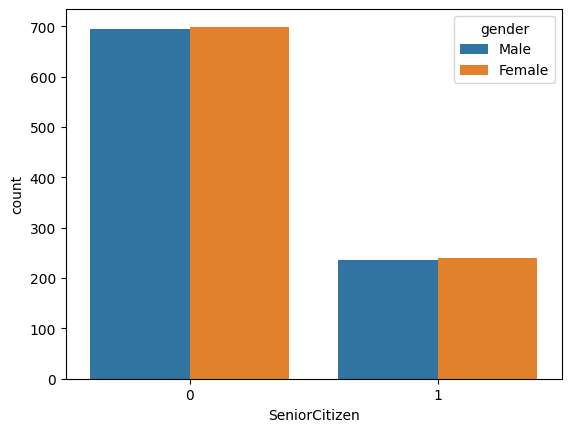

In [93]:
#As senior citizen are low churners analysing senior citizens who churn will be a important classification

sns.countplot(data= orig_out1 , x='SeniorCitizen' , hue= 'gender')


Conclusion- No significant conclusion almost same ratio of males and females who churn

<AxesSubplot: xlabel='SeniorCitizen', ylabel='count'>

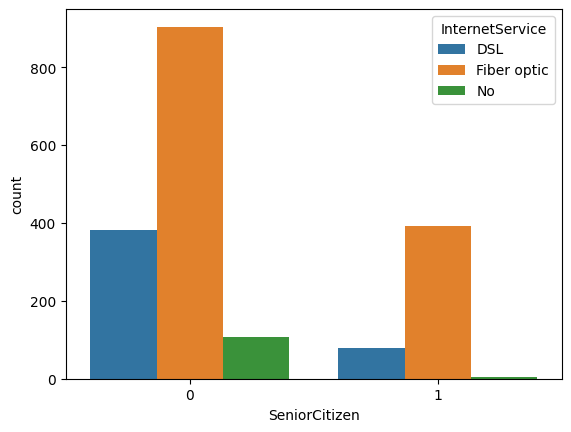

In [94]:
# Senior citizen and internet service
sns.countplot(data= orig_out1 , x='SeniorCitizen' , hue= 'InternetService')

Conclusion- Fibre optic connections can be seen as a major cause of churning in both senior and non senior citizens
As the senior citizen who churn are considerably lesser this can be termed as a root cause of churning

<AxesSubplot: xlabel='SeniorCitizen', ylabel='count'>

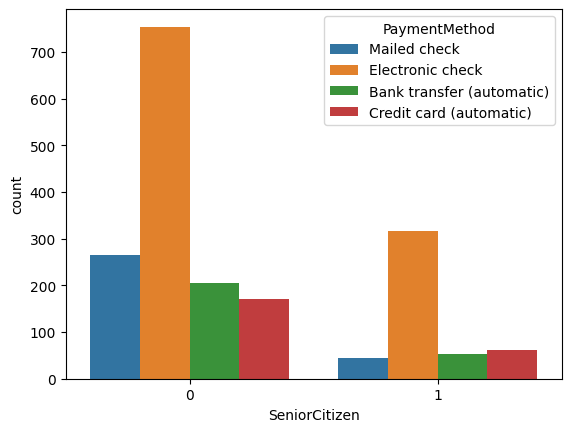

In [95]:
# Senior citizen and payment method
sns.countplot(data= orig_out1 , x='SeniorCitizen' , hue= 'PaymentMethod')

Conclusion- Electronic check is another major considerable reason for churning in both senior and non senior citizens especially in non senior and should be discontinued with.

<AxesSubplot: xlabel='SeniorCitizen', ylabel='count'>

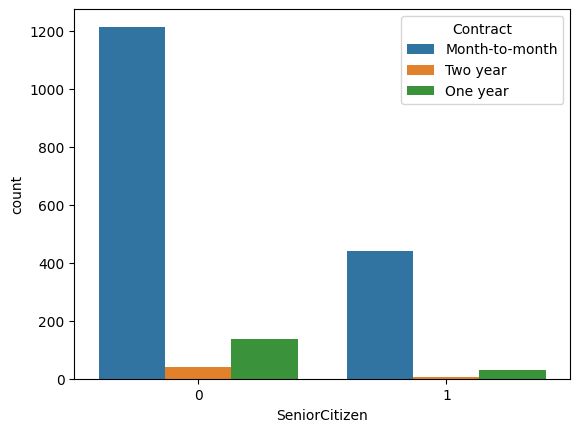

In [97]:
sns.countplot(data= orig_out1 , x='SeniorCitizen' , hue= 'Contract')

Conclusion- In both senior and non senior month to month is a significant cause for churning, for non senior it is a very important parameter


<AxesSubplot: xlabel='gender', ylabel='count'>

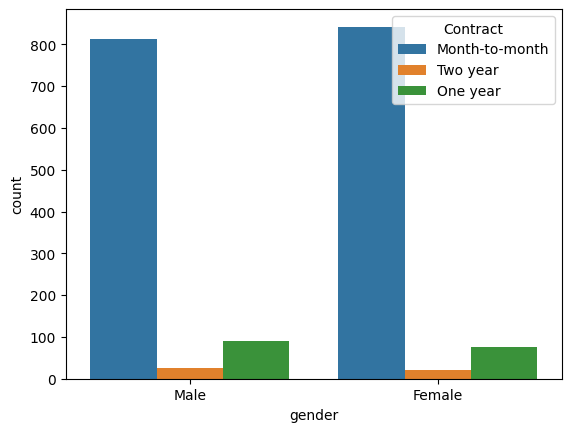

In [98]:
#Gender and Contract type
sns.countplot(data= orig_out1 , x='gender' , hue= 'Contract')

Conclusion- No significant conclusion on gender classfication.

FINAL CONCLUSIONS AND BUSINESS SUGGESTIONS:


1. Work on reduction of fibre optic connections.
2. Implement schemes making yearly contracts cheap attracting customer base out of monthly contracts.
3. Work on reduction of electronic check payment method and provide offers on credit card payments ; tie ups with  credit card firms recommended for better profits.
4. Improve online security, backup, tech support.
5. Device Protection schemes should be implemented.
6. Paperless billing should be reduced as much as possible.
7. Senior citizens act as a permanent customer base who dont switch to other services very less, so special schemes targeting senior citizens should be implemented.


In [ ]:
df.to_csv('processed_data.csv')  
#for model building we need processed data 